In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
import statsmodels as sm
import statsmodels.formula as smf

### Resampling

Text(0.5, 0.98, '')

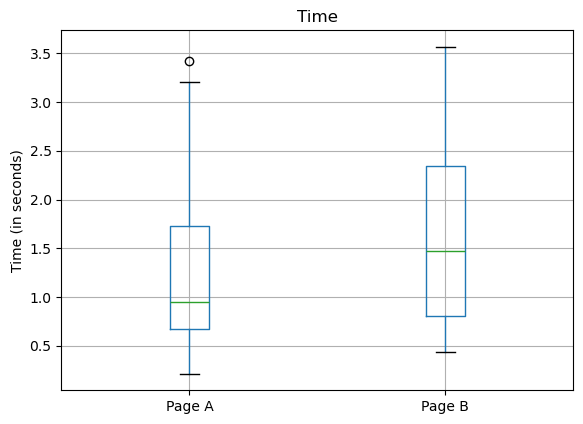

In [3]:
session_times = pd.read_csv(r'data/web_page_data.csv')
ax = session_times.boxplot(by = 'Page', column = 'Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

In [4]:
session_times

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [5]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
mean_b - mean_a

0.3566666666666669

In [6]:
nA = session_times[session_times.Page == 'Page A'].shape[0]
nB = session_times[session_times.Page == 'Page B'].shape[0]

In [7]:
session_times

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67
5,Page B,0.85
6,Page A,2.11
7,Page B,2.46
8,Page A,1.32
9,Page B,1.49


In [8]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

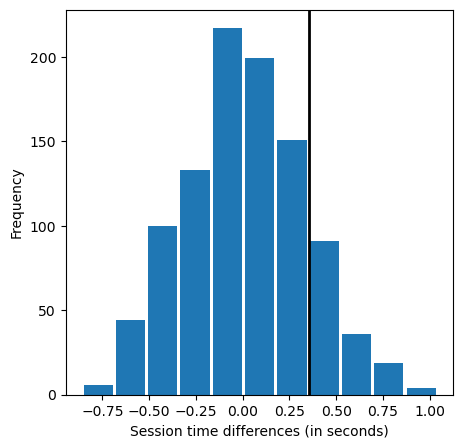

In [9]:
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = mean_b - mean_a, color = 'black', lw = 2)
# ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency');

### Statistical Significance and p-Values

In [10]:
obs_pct_diff = 100* (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff:.4f}%')
conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

Observed difference: 0.0368%


In [11]:
perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in range(1000)]

Text(0, 0.5, 'Frequency')

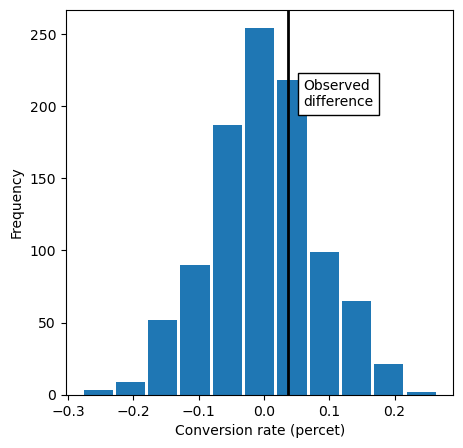

In [12]:
fig, ax = plt.subplots(figsize = (5,5))
ax.hist(perm_diffs, bins = 11, rwidth = 0.9)
ax.axvline(x = obs_pct_diff, color = 'black', lw = 2)
ax.text(0.06, 200, 'Observed\ndifference', bbox = {'facecolor': 'white'})
ax.set_xlabel('Conversion rate (percet)')
ax.set_ylabel('Frequency')

De la figura *3-5: Frequency distribution for the difference in conversion rates between prices A and B*, podemos ver que la distribución esta centrada aproximadamente al rededor de $0$ y un **valor-p** de $0.308$ de la prueba de permutación.\
Dado que queremos contestar la pregunta:\
¿Que tan frecuente es que el la diferencia entre la conversión de precios es mayor o igual a la diferencia observada?\
De aquí podemos tener las siguientes hipótesis:
   1. La diferencia es menor a la observada.
   2. La diferencia es mayor a la observada.
   3. La diferencia es $0$.

En este caso, solo nos interesa rechazar la hipótesis en la que la diferencia es mayor a la observada para saber con que frecuencia se pueden encontrar conversiones como las observadas producidas de manera aleatoria. Ya que nos interesa solo un lado de la cola de la distribución para poder determinar si la diferencia es significativamente mayor a la observada podemos tomar $\frac{1}{2}[P(>0.0368)]$.

Después de hacer la corrección de Yates, obtenemos un valor $\chi_1^2 = 0.14893$. El cuál nos da un valor aproximado de $0.70$. Dividiendolo entre $2$ para tomar solo el lado derecho de la cola tenemos: $\frac{1}{2}(0.70) \approx 0.35$. 

Por lo que el **valor-p** obtenido con la prueba de $\chi_1^2$ utilizando la tabla de contingencia es de $\approx 0.35$. 

#### p-value

In [13]:
np.mean([diff > obs_pct_diff for diff in perm_diffs])

0.315

In [14]:
survivors = np.array([[200, 182], [23539, 22406]])
#survivors = np.array([[10, 10, 20], [20, 20, 20]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


In [14]:
p_value;

In [15]:
1-0.5*0.0002

0.9999

In [16]:
chi2

0.14893055235461503

In [17]:
aConv = 200
aNonConv = 23539
bConv = 182
bNonConv = 22406

Conv = aConv + bConv
NonConv = aNonConv + bNonConv
aTot = aConv + aNonConv
bTot = bConv + bNonConv
Tot = Conv + NonConv

ExpConvR = Conv/Tot
ExpNonConvR = NonConv/Tot
aConvExp = ExpConvR * aTot
bConvExp = ExpConvR * bTot
aNonConvExp = ExpNonConvR * aTot
bNonConvExp = ExpNonConvR * bTot

# Hay que usar la corrección de Yates
# https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity

chi2 = (np.abs(aConv - aConvExp) - 0.5)**2 / aConvExp + (np.abs(bConv - bConvExp) - 0.5)**2 / bConvExp + (np.abs(aNonConv - aNonConvExp) - 0.5)**2 / aNonConvExp + (np.abs(bNonConv - bNonConvExp) - 0.5)**2 / bNonConvExp;

In [18]:
chi2

0.14893055235461386

### T-Tests

In [19]:
res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time,
               session_times[session_times.Page == 'Page B'].Time,
               equal_var = False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

res.statistic

p-value for single sided test: 0.1408


-1.0983155623638117

#### Manual implementation of t-test

In [20]:
session_times.Time = session_times.Time*100

In [21]:
mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
var_a = session_times[session_times.Page == 'Page A'].Time.var()
var_b = session_times[session_times.Page == 'Page B'].Time.var()
n_a = session_times[session_times.Page == 'Page A'].Time.size
n_b = session_times[session_times.Page == 'Page B'].Time.size

In [22]:
tvalue = (mean_a - mean_b)/np.sqrt(var_a/n_a + var_b/n_b)

In [23]:
tvalue

-1.098315562363811

#### AVOVA

In [24]:
four_sessions = pd.read_csv('four_sessions.csv')

In [25]:
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


In [26]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
Pr(Prob) 0.078


#### F-Statistic

In [27]:
model = smf.ols('Time ~ Page', data = four_sessions).fit()

aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


In [28]:
(11.33-14)/np.sqrt(11.33)

-0.7932248412147792

### Chi-Square Test

In [29]:
clicks = pd.read_csv("click_rates.csv")
clicks

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988


In [30]:
# Tenemos que crear la lista de cero para poder usarla en la función "chi2"
clicks = [[14, 986], [8, 992], [12, 988]]
clicks

[[14, 986], [8, 992], [12, 988]]

In [31]:
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

In [32]:
def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect 
                                  for observe in row])
# return sum of squares
    return np.sum(pearson_residuals)

In [33]:
expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks, expected)

In [34]:
def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

In [35]:
perm_chi2 = [perm_fun(box) for _ in range(2000)]

In [36]:
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 84794.7034
Resampled p-value: 0.0000


In [37]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 84794.7034
p-value: 0.4348
